In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import fiona
from rasterio.warp import reproject, Resampling
from rasterio.plot import show
from rasterio.mask import mask
%matplotlib inline

First I'll import the most recent CLPX DEM. No offsets have been applied yet,

The DEM was moasiced from June5_2017_CLPX... tiles downloaded from the ftp and resampled to 1m x 1m

In [3]:
dem_src = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/clpx_june5_2017_DEM.tif')
dem_src.meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 397068.0,
       0.0, -1.0, 7624870.0),
 'width': 20480}

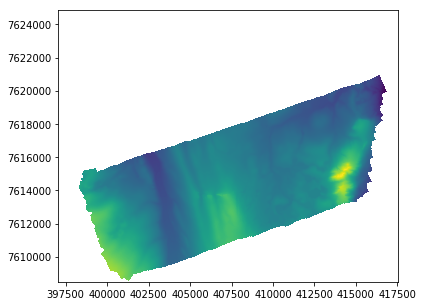

In [7]:
plt.figure(figsize=(8, 5))
show(dem_src)

Next the June ortho. Also moasiced and resampled to 1m x 1m.

In [8]:
dem_ortho_src = rasterio.open('/home/cparr/surfaces/orthos/clpx/clpx_june5_2017_ortho.tif')
dem_ortho_src.meta

{'count': 4,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 16384,
 'nodata': None,
 'transform': Affine(1.0, 0.0, 398083.0,
       0.0, -1.0, 7621635.0),
 'width': 20480}

The ortho has the same dimensions (16384 x 20480) 

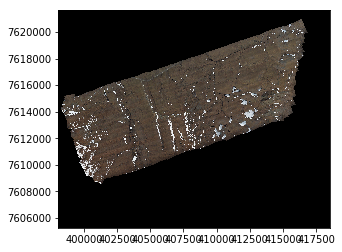

In [9]:
show(dem_ortho_src)

In [ ]:
snow_src = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/clpx_apr11_2017.tif')
snow_src.meta

In [ ]:
dem_src.meta['height'] * dem_src.meta['width'] == snow_src.meta['height'] * snow_src.meta['width']

In [ ]:
snow_arr = snow_src.read(1)

new_snow_arr = np.empty(shape=(
                            snow_arr.shape[0],
                            snow_arr.shape[1]))

dem_aff = dem_src.transform

new_snow_aff = rasterio.Affine(dem_aff.a, dem_aff.b, dem_aff.c,
                          dem_aff.d, dem_aff.e, dem_aff.f)

reproject(
    snow_arr, new_snow_arr,
    src_transform = snow_src.transform,
    dst_transform = new_snow_aff,
    src_crs = dem_src.crs,
    dst_crs = dem_src.crs,
    resample = Resampling.bilinear)

In [ ]:
depth = 0.35+new_snow_arr - dem_src.read(1)


depth[depth < -0.3] = np.nan

depth[depth > 10] = np.nan

mu = np.nanmean(depth)
sigma = np.nanstd(depth)
dmin = np.nanmin(depth)
dmax = np.nanmax(depth)

In [ ]:
fig = plt.figure(figsize = (32,20))
ax = fig.add_subplot(111)

im = ax.imshow(depth,vmin=0, vmax=1, cmap ='coolwarm')

ax.set_title("2017 CLPX Snow Depth [m]" +'\n'+
             "$\mu=%.2f$, $\sigma=%.2f$"  %(mu,sigma)  +'\n'+
             "min = %.2f, max = %.2f" %(dmin,dmax),fontsize=20)
fig.colorbar(im)

In [ ]:
plt.plot(depth[6000])